# Melanoma Skin Cancer Detection

In [153]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from melanoma_detection.models import MelanomaNetwork, ResNet
from melanoma_detection.utils.metrics_utils import plot_metrics, compute_metrics
from melanoma_detection.preprocess_dataset import create_test_dataset, create_train_dataset, MelanomaDataset
from melanoma_detection.transforms import AdjustSharpness, MelanomaMaskTransform
from melanoma_detection.utils.img_utils import plot_image
from melanoma_detection.models.base import StoppingCriteria
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim

In [154]:
# Constants
BATCH_SIZE = 8
EPOCHS = 20

# Imagenet normalization values
# MEAN = [0.485, 0.456, 0.406]
# STD = [0.229, 0.224, 0.225]
MEAN = [0.726, 0.560, 0.543]
STD = [0.210, 0.202, 0.216]


SEED = 23
torch.manual_seed(SEED)

In [155]:
# Transforms to be applied to data loaders
transform_train = transforms.Compose(
    [
        # MelanomaMaskTransform(),
        transforms.Resize((124, 124), antialias=True),  # Resize the image to 224x224 pixels
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        AdjustSharpness(3),
        transforms.ToTensor(),
        transforms.Normalize(MEAN, STD),
    ]
)

transform_validation = transforms.Compose(
    [
        transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
        # MelanomaMaskTransform(),
        transforms.ToTensor(),
        transforms.Normalize(MEAN, STD),
    ]
)

In [156]:
train_loader = DataLoader(
    MelanomaDataset(create_train_dataset(), transform=transform_train),
    BATCH_SIZE,
    shuffle=True,
    num_workers=10,
)

test_loader = DataLoader(
    MelanomaDataset(create_test_dataset(), transform=transform_validation),
    BATCH_SIZE,
    shuffle=False,
    num_workers=10,
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


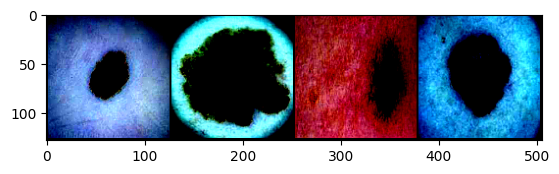

0.0 1.0 0.0 1.0


In [158]:
sample_data = DataLoader(
    MelanomaDataset(create_train_dataset(), transform=transforms.Compose(
        [
            transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
            transforms.ToTensor(),
        ])),
    4,
    shuffle=True,
    num_workers=10,
)

# torch.manual_seed(SEED)

sample_data_w_tf = DataLoader(
    MelanomaDataset(create_train_dataset(), transform=transform_train),
    4,
    shuffle=True,
    num_workers=10,
)


# get some random training images
dataiter = iter(sample_data)
images, labels = dataiter.__next__()

plot_image(torchvision.utils.make_grid(images, 4))
print(' '.join(f'{labels[j]}' for j in range(4)))

dataiter = iter(sample_data_w_tf)
images, labels = dataiter.__next__()

plot_image(torchvision.utils.make_grid(images, 4))
print(' '.join(f'{labels[j]}' for j in range(4)))

In [13]:
net = MelanomaNetwork()

criterion = torch.nn.BCEWithLogitsLoss()

optimizer = optim.Adam(
    net.parameters(),
    # lr=6.051040788116986e-05,
    # betas=(0.8362066397681903, 0.9907655800812818),
    # weight_decay=3.6250408963045035e-10,
    lr=0.0002288372831567034,
    betas=(0.8378331684737104, 0.9034144582679383),
    weight_decay=3.358130934902445e-09,
)

net.fit(
    train_loader,
    test_loader,
    EPOCHS,
    optimizer,
    criterion,
    StoppingCriteria(3),
    True,
)

PATH = "./best_model"
net.save(PATH)

Loss: 1.525177:   2%|▏         | 8/372 [00:02<01:40,  3.62it/s]


KeyboardInterrupt: 

In [ ]:
net = MelanomaNetwork()

criterion = torch.nn.BCEWithLogitsLoss()
net.load("best_model")
net.validate(test_loader, criterion)

net.load("best_model_custom.pth")
net.validate(test_loader, criterion)

net = ResNet()
net.load("best_model_resnet.pth")
net.validate(test_loader, criterion)

Validation: 100%|██████████| 63/63 [00:02<00:00, 30.38it/s]


Validation Loss: 0.301175, Accuracy: 89.00%


Validation: 100%|██████████| 63/63 [00:02<00:00, 30.96it/s]


Validation Loss: 2.840193, Accuracy: 50.15%


Validation: 100%|██████████| 63/63 [00:05<00:00, 11.66it/s]

Validation Loss: 0.559042, Accuracy: 64.75%


(0.5590423673006987,
 64.75,
 {'accuracy': 0.6475,
  'precision': 0.5878499106611078,
  'recall': 0.987,
  'f1_score': 0.7368421052631579,
  'auc': 0.6475})